# Part I - (FordGoBikes Analysis)
## by Tamuno-omi Jaja

## Introduction

> The Ford GoBike System data includes information about individual rides covering the greater San Francisco Bay area, The dataset contains 183,412 individual rides and 16 features that outline customer information, the ride duration and start-end destination. In this notebook, I will be looking at the relationship Ride duration has with other variables, in other to accomplish this I will perform  the various steps below

1. <a href=#Preliminary_Wrangling>Preliminary Wrangling</a>

2. <a href=#Feature_Engineering>Feature Engineering</a>

3. <a href=#Univariate_Exploration>Univariate Exploration</a>

4. <a href=#Bivariate_Exploration>Bivariate Exploration</a>

5. <a href=#Multivariate_Exploration>Multivariate Exploration</a>

6. <a href=#Conclusions>Conclusions</a>

## Preliminary Wrangling <a name='Preliminary_Wrangling' />

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
!pip install geopy
#!pip install -U seaborn
import geopy.distance as gp
%matplotlib inline

    100% |████████████████████████████████| 122kB 4.5MB/s ta 0:00:01


> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [3]:
# load dataset
bike_df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [4]:
# dataset info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [5]:
# dataset features
bike_df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [6]:
# view first 5 rows
bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [7]:
# check possible gender values
bike_df.member_gender.unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

In [8]:
# check values without end station name
bike_df[bike_df.end_station_id.isnull()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
475,1709,2019-02-28 20:55:53.9320,2019-02-28 21:24:23.7380,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4211,Customer,1991.0,Female,No
1733,1272,2019-02-28 18:32:34.2730,2019-02-28 18:53:46.7270,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4174,Subscriber,1980.0,Male,No
3625,142,2019-02-28 17:10:46.5290,2019-02-28 17:13:09.4310,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4283,Subscriber,1988.0,Male,No
4070,585,2019-02-28 16:28:45.9340,2019-02-28 16:38:31.3320,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.92,4089,Subscriber,1984.0,Male,Yes
5654,509,2019-02-28 12:30:17.1310,2019-02-28 12:38:46.3290,NaN,NaN,37.40,-121.92,NaN,NaN,37.39,-121.93,4089,Subscriber,1984.0,Male,Yes
6214,1334,2019-02-28 10:32:47.9300,2019-02-28 10:55:02.0280,NaN,NaN,37.40,-121.93,NaN,NaN,37.38,-121.93,4150,Customer,1990.0,Male,No
8499,240,2019-02-28 08:23:07.0920,2019-02-28 08:27:07.2890,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.95,4283,Subscriber,1988.0,Male,No
8783,883,2019-02-28 07:58:07.3720,2019-02-28 08:12:51.2760,NaN,NaN,37.41,-121.96,NaN,NaN,37.40,-121.94,4211,Subscriber,1980.0,Male,No
10967,116,2019-02-27 19:25:57.0360,2019-02-27 19:27:54.0260,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.95,4283,Subscriber,1988.0,Male,No
11071,828,2019-02-27 19:03:14.6380,2019-02-27 19:17:03.4340,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4091,Subscriber,1980.0,Male,No


In [9]:
# Number of unique entries in bikes_id
bike_df.bike_id.nunique()

4646

In [10]:
# top 10 counts of bike id
bike_count = bike_df.bike_id.value_counts()
bike_count[:10]

4794    191
4814    176
5014    174
4422    174
5175    173
5145    173
4450    172
5482    171
4773    170
5274    170
Name: bike_id, dtype: int64

In [11]:
# datatypes of features
bike_df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [12]:
# customer groups
bike_df.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

In [13]:
# summary stats
bike_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [14]:
# Check immortal customer born in 1878 (142years in 2019(ride year))
bike_df.query('member_birth_year == "1878"')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
27370,1474,2019-02-25 09:28:42.1610,2019-02-25 09:53:17.0680,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,386.0,24th St at Bartlett St,37.752105,-122.419724,6436,Customer,1878.0,Female,No


In [15]:
# Check ride information for customer that took a ride of 85444 seconds 23.73 hours
bike_df.query('duration_sec == "85444"')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
101361,85444,2019-02-13 17:59:55.1240,2019-02-14 17:43:59.9540,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,98.0,Valencia St at 16th St,37.765052,-122.421866,6168,Subscriber,NaN,NaN,No


In [16]:
# Check rides between same start and end stations
bike_df.query('start_station_name == "Powell St BART Station (Market St at 5th St)" & end_station_name == "Valencia St at 16th St"')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
2336,608,2019-02-28 18:08:15.4480,2019-02-28 18:18:23.7100,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,98.0,Valencia St at 16th St,37.765052,-122.421866,4452,Subscriber,1986.0,Male,No
4629,751,2019-02-28 15:19:38.3170,2019-02-28 15:32:09.3970,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,98.0,Valencia St at 16th St,37.765052,-122.421866,674,Subscriber,1978.0,Male,No
14436,606,2019-02-27 12:18:35.1750,2019-02-27 12:28:41.2500,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,98.0,Valencia St at 16th St,37.765052,-122.421866,4800,Customer,1988.0,Male,No
64297,658,2019-02-20 12:23:20.3630,2019-02-20 12:34:18.9700,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,98.0,Valencia St at 16th St,37.765052,-122.421866,1553,Subscriber,1982.0,Male,No
68717,937,2019-02-19 21:12:24.2180,2019-02-19 21:28:01.6220,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,98.0,Valencia St at 16th St,37.765052,-122.421866,4713,Subscriber,1980.0,Male,No
81951,1451,2019-02-18 11:35:10.5640,2019-02-18 11:59:21.8440,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,98.0,Valencia St at 16th St,37.765052,-122.421866,4466,Subscriber,1988.0,Female,No
81952,1446,2019-02-18 11:35:14.2420,2019-02-18 11:59:20.4500,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,98.0,Valencia St at 16th St,37.765052,-122.421866,4805,Customer,1987.0,Male,No
92716,736,2019-02-15 18:24:35.9550,2019-02-15 18:36:52.5670,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,98.0,Valencia St at 16th St,37.765052,-122.421866,5163,Subscriber,1986.0,Male,No
101361,85444,2019-02-13 17:59:55.1240,2019-02-14 17:43:59.9540,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,98.0,Valencia St at 16th St,37.765052,-122.421866,6168,Subscriber,NaN,NaN,No
134093,3369,2019-02-08 17:05:25.4710,2019-02-08 18:01:34.5240,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,98.0,Valencia St at 16th St,37.765052,-122.421866,5027,Subscriber,1993.0,Female,Yes


In [17]:
# check ride that lasted one minute
bike_df.query('duration_sec == "61"')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
18578,61,2019-02-26 18:23:44.2830,2019-02-26 18:24:45.5230,368.0,Myrtle St at Polk St,37.785434,-122.419622,368.0,Myrtle St at Polk St,37.785434,-122.419622,5333,Subscriber,1989.0,Female,No
19581,61,2019-02-26 16:40:53.1210,2019-02-26 16:41:54.4510,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5306,Subscriber,1987.0,Female,No
27017,61,2019-02-25 10:31:18.4150,2019-02-25 10:32:19.7480,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,5921,Subscriber,1972.0,Male,Yes
44301,61,2019-02-22 15:09:57.0480,2019-02-22 15:10:58.7420,310.0,San Fernando St at 4th St,37.335885,-121.885660,280.0,San Fernando St at 7th St,37.337122,-121.883215,6347,Subscriber,1989.0,Male,Yes
44787,61,2019-02-22 13:56:21.9760,2019-02-22 13:57:23.4650,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,81.0,Berry St at 4th St,37.775880,-122.393170,6150,Subscriber,1931.0,Male,No
51120,61,2019-02-21 18:27:34.9930,2019-02-21 18:28:36.6300,113.0,Franklin Square,37.764555,-122.410345,100.0,Bryant St at 15th St,37.767100,-122.410662,6515,Subscriber,1984.0,Male,No
58992,61,2019-02-20 21:44:00.1540,2019-02-20 21:45:01.2350,85.0,Church St at Duboce Ave,37.770083,-122.429156,85.0,Church St at Duboce Ave,37.770083,-122.429156,4351,Subscriber,1994.0,Male,No
64088,61,2019-02-20 13:08:18.2850,2019-02-20 13:09:19.4330,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,80.0,Townsend St at 5th St,37.775235,-122.397437,2090,Subscriber,1931.0,Male,No
80047,61,2019-02-18 16:31:12.8960,2019-02-18 16:32:14.5880,89.0,Division St at Potrero Ave,37.769218,-122.407646,101.0,15th St at Potrero Ave,37.767079,-122.407359,6195,Subscriber,1931.0,Male,No
82564,61,2019-02-18 09:53:31.3990,2019-02-18 09:54:33.1620,249.0,Russell St at College Ave,37.858473,-122.253253,249.0,Russell St at College Ave,37.858473,-122.253253,3054,Subscriber,1990.0,Male,No


### What is the structure of your dataset?

> The dataset contains 183,412 individual rides and 16 features that outline customer information, the ride duration and start-end destination.

### What is/are the main feature(s) of interest in your dataset?

> I'm interested in figuring what features are important to predicting the ride duration.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect the distance between the start-end destination to be the major determinant of the ride duration, However I'm interested in observing the relationship between ride duration and other features like user age & gender , Start- end time, and number of previous rides taken with bike

### Data Cleaning

I will proceed to remedy the quality issues identified.

1. Convert incorrect data types of features : start/end time, start/end station id, bike_id, member birth year, user_type, member_gender
2. Drop row with wrong member birth year 1878

**Issue 1: Convert incorrect data types of features : start/end time, start/end station id, bike_id, member birth year, user_type, member_gender**

**Code:**

In [18]:
#drop nulls in numeric columns to enable conversion to integer
bike_df.dropna(subset=['start_station_id','end_station_id','member_birth_year'],inplace = True)
# convert features to correct format
bike_df['start_time'] = pd.to_datetime(bike_df['start_time']);
bike_df['end_time'] = pd.to_datetime(bike_df['end_time']);
bike_df['start_station_id'] = bike_df['start_station_id'].astype('int');
bike_df['end_station_id'] = bike_df['end_station_id'].astype('int');

bike_df['bike_id'] = bike_df['bike_id'].astype('int16');
bike_df['member_birth_year'] = bike_df['member_birth_year'].astype('int16');
bike_df['member_gender'] = bike_df['member_gender'].astype('category');
bike_df['user_type'] = bike_df['user_type'].astype('category');

**Test**

In [19]:
bike_df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int16
user_type                        category
member_birth_year                   int16
member_gender                    category
bike_share_for_all_trip            object
dtype: object

In [20]:
bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No


In [21]:
bike_df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No


**Issue 2: Drop row where member birth year from 1878**

**Code**

In [22]:
# View row with incorrect member_birth_year
bike_df.query("member_birth_year == '1878'")

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
27370,1474,2019-02-25 09:28:42.161,2019-02-25 09:53:17.068,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,386,24th St at Bartlett St,37.752105,-122.419724,6436,Customer,1878,Female,No


In [23]:
# identify row where birth year is 1878 and drop
bike_df.drop(27370,inplace = True)

**Test**

In [24]:
# confirm 
bike_df.query("member_birth_year == '1878'")

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


## Feature Engineering <a name='Feature_Engineering' />

I'll be creating the additional features from the existing ones:
>
>**duration_min** column with ride duration in minutes
>
> **distance_km** column that gives the distance between the Start and End station.
>
> **previous_bike_usage** column that counts the previous amount time that a particular bike was used
>
>**Create year, month, day,  hour from start_time**
>
>**Age** Get age of member  in from member_birth_year

In [25]:
# Create Ride distance from start to end station
bike_df['distance_km'] = bike_df.apply(lambda r: gp.geodesic((r.start_station_latitude, r.start_station_longitude), (r.end_station_latitude, r.end_station_longitude)).km,axis=1)

In [26]:
# confirm changes
bike_df.tail(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance_km
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278,The Alameda at Bush St,37.331932,-121.904888,277,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990,Male,Yes,0.379546
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988,Male,No,0.746150
183411,271,2019-02-01 00:00:20.636,2019-02-01 00:04:52.058,24,Spear St at Folsom St,37.789677,-122.390428,37,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989,Male,No,0.710488


In [28]:
# get count of times bike has been used
bike_df['previous_bike_rides'] = bike_df.sort_values(by='start_time').groupby('bike_id')['start_time'].cumcount()


In [30]:
# confirm changes
bike_df.query("bike_id == 4450 & previous_bike_rides <10").head(10).sort_values(by=['start_time'])

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance_km,previous_bike_rides
183269,191,2019-02-01 05:59:58.191,2019-02-01 06:03:09.761,106,Sanchez St at 17th St,37.763242,-122.430675,223,16th St Mission BART Station 2,37.764765,-122.420091,4450,Subscriber,1988,Male,No,0.947759,0
182495,278,2019-02-01 08:15:45.878,2019-02-01 08:20:24.386,223,16th St Mission BART Station 2,37.764765,-122.420091,124,19th St at Florida St,37.760447,-122.410807,4450,Subscriber,1983,Male,No,0.948130,1
181921,739,2019-02-01 08:40:55.794,2019-02-01 08:53:15.146,124,19th St at Florida St,37.760447,-122.410807,81,Berry St at 4th St,37.775880,-122.393170,4450,Subscriber,1991,Female,No,2.312793,2
181326,343,2019-02-01 09:18:43.863,2019-02-01 09:24:27.203,349,Howard St at Mary St,37.781010,-122.405666,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,4450,Subscriber,1997,Male,No,1.047554,3
180440,542,2019-02-01 11:01:52.310,2019-02-01 11:10:54.357,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,81,Berry St at 4th St,37.775880,-122.393170,4450,Subscriber,1978,Male,No,1.667522,4
180381,428,2019-02-01 11:15:43.368,2019-02-01 11:22:51.421,81,Berry St at 4th St,37.775880,-122.393170,130,22nd St Caltrain Station,37.757288,-122.392051,4450,Subscriber,1986,Male,No,2.065872,5
179935,1258,2019-02-01 12:12:29.789,2019-02-01 12:33:28.556,130,22nd St Caltrain Station,37.757288,-122.392051,324,Union Square (Powell St at Post St),37.788300,-122.408531,4450,Subscriber,1970,Male,No,3.735724,6
179784,1192,2019-02-01 12:37:56.265,2019-02-01 12:57:48.333,324,Union Square (Powell St at Post St),37.788300,-122.408531,109,17th St at Valencia St,37.763316,-122.421904,4450,Subscriber,1994,Female,No,3.012952,7
179581,758,2019-02-01 13:17:17.793,2019-02-01 13:29:56.685,109,17th St at Valencia St,37.763316,-122.421904,355,23rd St at Tennessee St,37.755367,-122.388795,4450,Subscriber,1996,Male,No,3.047986,8
178202,980,2019-02-01 17:29:03.108,2019-02-01 17:45:23.801,355,23rd St at Tennessee St,37.755367,-122.388795,58,Market St at 10th St,37.776619,-122.417385,4450,Subscriber,1994,Female,No,3.451041,9


In [31]:
# Create date columns
bike_df['hour'] = bike_df['start_time'].dt.hour
bike_df['day'] = bike_df['start_time'].dt.strftime('%A')
bike_df['month'] = bike_df['start_time'].dt.month
bike_df['year'] = bike_df['start_time'].dt.year
bike_df['month_name'] = bike_df['start_time'].dt.strftime('%B')

In [32]:
# Get ride duration in minutes
bike_df['duration_min'] = bike_df['duration_sec'] / 60

In [33]:
# confirm changes
bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,distance_km,previous_bike_rides,hour,day,month,year,month_name,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,...,Male,No,0.543983,134,17,Thursday,2,2019,February,869.750000
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,...,Male,No,2.705390,52,12,Thursday,2,2019,February,1030.900000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,...,Other,No,0.260896,116,17,Thursday,2,2019,February,608.166667
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,...,Male,Yes,2.412017,77,23,Thursday,2,2019,February,26.416667
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,...,Male,No,3.328256,83,23,Thursday,2,2019,February,29.883333


In [34]:
bike_df['duration_min'].describe()

count    174951.000000
mean         11.733306
std          27.370143
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

In [35]:
bike_df['member_age'] = bike_df['year'] - bike_df['member_birth_year']

**Store clean version to csv**

In [36]:
bike_df.to_csv('bike_trips_clean', index = False)

In [37]:
bike_df = pd.read_csv('bike_trips_clean')

## Univariate Exploration <a name='Univariate_Exploration' />

> I'll start by looking at the distribution of the main variable of interest: Duration.

In [38]:
bike_df['duration_min'].describe()

count    174951.000000
mean         11.733306
std          27.370143
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

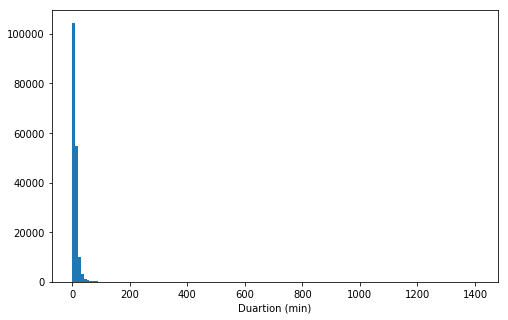

In [39]:
# start with a standard-scaled plot
binsize = 10
bins = np.arange(0, bike_df['duration_min'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike_df, x = 'duration_min', bins = bins)
plt.xlabel('Duartion (min)')
plt.show()

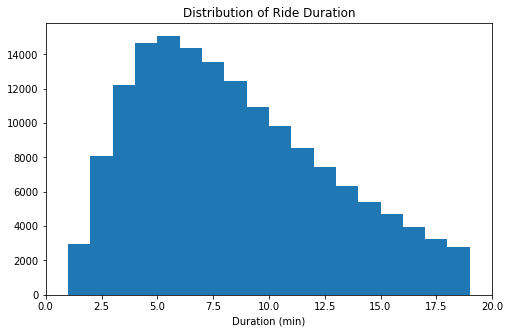

In [40]:
# investigating further on an even smaller bin size
binsize = 1
bins = np.arange(0, 20, 1)

plt.figure(figsize=[8, 5])
plt.hist(data = bike_df, x = 'duration_min', bins = bins)
plt.xlim([0,20])
plt.xlabel('Duration (min)')
plt.title('Distribution of Ride Duration')
plt.show()

Visualizing with a smaller bin shows that most rides are between three to twelve minutes and that Duration(min) is Right Skewed, pointing to a user preference for shorter trips. Next to the dependent variables starting with Distance(km)

In [41]:
bike_df['distance_km'].describe()

count    174951.000000
mean          1.689919
std           1.096496
min           0.000000
25%           0.909710
50%           1.428159
75%           2.224635
max          69.465977
Name: distance_km, dtype: float64

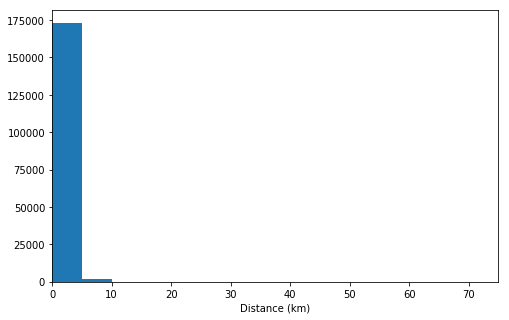

In [42]:
# Plotting Distance(km)

binsize = 5
bins = np.arange(0, 75, 5)

plt.figure(figsize=[8, 5])
plt.hist(data = bike_df, x = 'distance_km', bins = bins)
plt.xlim([0,75])
plt.xlabel('Distance (km)')
plt.show()

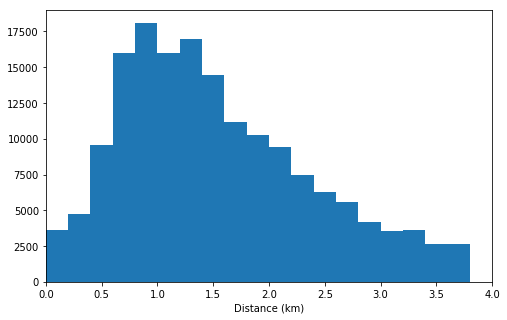

In [43]:
# investigating further on an even smaller bin size to compensate for outlier
binsize = 0.2
bins = np.arange(0, 4, 0.2)
plt.figure(figsize=[8, 5])
plt.hist(data = bike_df, x = 'distance_km', bins = bins)
plt.xlim([0,4])
plt.xlabel('Distance (km)')
plt.show()

The Distance distribution looks roughly bimodal, with one peak between 0.8 and 1 km, and a second peak a little below 1.5 km. Futher evidence of users taking mainly short trips, I'll now proceed to the previous_bike_rides variable.

In [44]:
# Get max_number of previous ride taken by each bike
bike_rides = bike_df.groupby(['bike_id'], sort=False)['previous_bike_rides'].max().reset_index()

In [45]:
bike_rides.head()

,bike_id,previous_bike_rides
0,4902,134
1,5905,52
2,6638,116
3,4898,77
4,5200,83


In [46]:
bike_rides['previous_bike_rides'].describe()

count    4607.000000
mean       36.975038
std        36.376040
min         0.000000
25%        11.000000
50%        24.000000
75%        52.000000
max       178.000000
Name: previous_bike_rides, dtype: float64

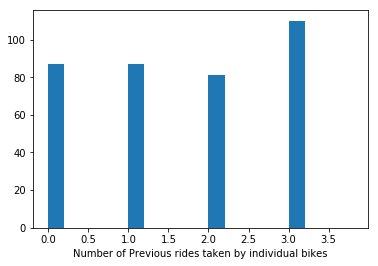

In [47]:
# investigating max previous
plt.hist(data = bike_rides, x = 'previous_bike_rides', bins = bins)
plt.xlabel('Number of Previous rides taken by individual bikes')
plt.show()

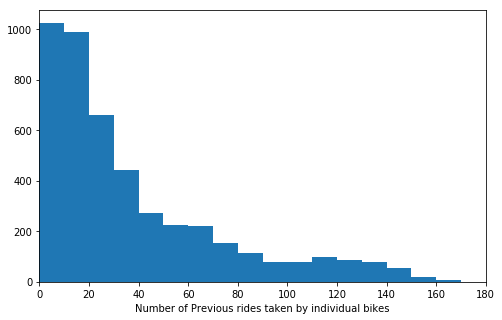

In [48]:
binsize = 10
bins = np.arange(0,180, 10)
plt.figure(figsize=[8, 5])
plt.hist(data = bike_rides, x = 'previous_bike_rides', bins = bins)
plt.xlim([0,180])
plt.xlabel('Number of Previous rides taken by individual bikes')
plt.show()

It seems that most bikes take between zero to sixty  max previous rides, with the variable being right skewed, I'm interested to see if the number of previous rides is correlated to the ride duration. I will  go on to look at the distribution of days of the week, ages and finally gender, type of users

In [49]:
bike_df['member_age'].describe()

count    174951.000000
mean         34.196255
std          10.115538
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         119.000000
Name: member_age, dtype: float64

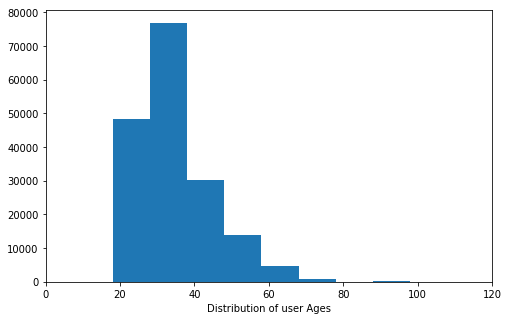

In [50]:
binsize = 10
bins = np.arange(18,120, 10)
plt.figure(figsize=[8, 5])
plt.hist(data = bike_df, x = 'member_age', bins = bins)
plt.xlim([0,120])
plt.xlabel('Distribution of user Ages');

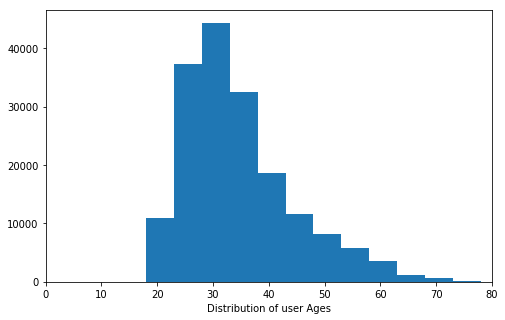

In [51]:
# Remove high outliers from age i.e >80
below_80 = bike_df.query("member_age < 80")
binsize = 5
bins = np.arange(18,80, 5)
plt.figure(figsize=[8, 5])
plt.hist(data = below_80, x = 'member_age', bins = bins)
plt.xlim([0,80])
plt.xlabel('Distribution of user Ages');

After excluding outliers above 80 years, It was observed that majority of users ages are between 18 and 50

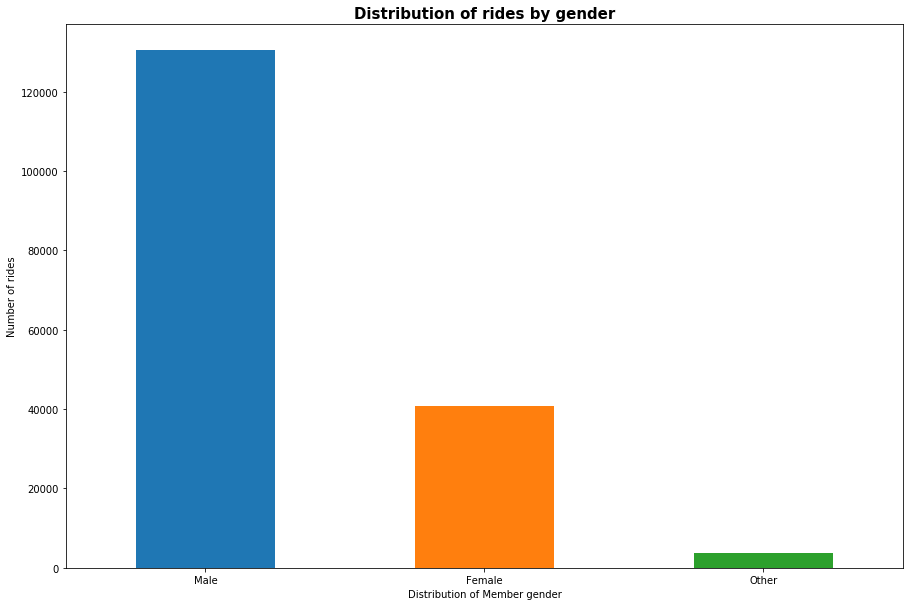

In [52]:
# Distribution of user gender



gender_count = bike_df['member_gender'].value_counts()
gender_count.plot.bar(figsize = (15,10), rot= 0)
plt.xlabel('Distribution of Member gender')
plt.ylabel('Number of rides')

plt.title('Distribution of rides by gender', weight='bold', fontsize=15);

Majority of members identify as Male, followed by Female and other genders

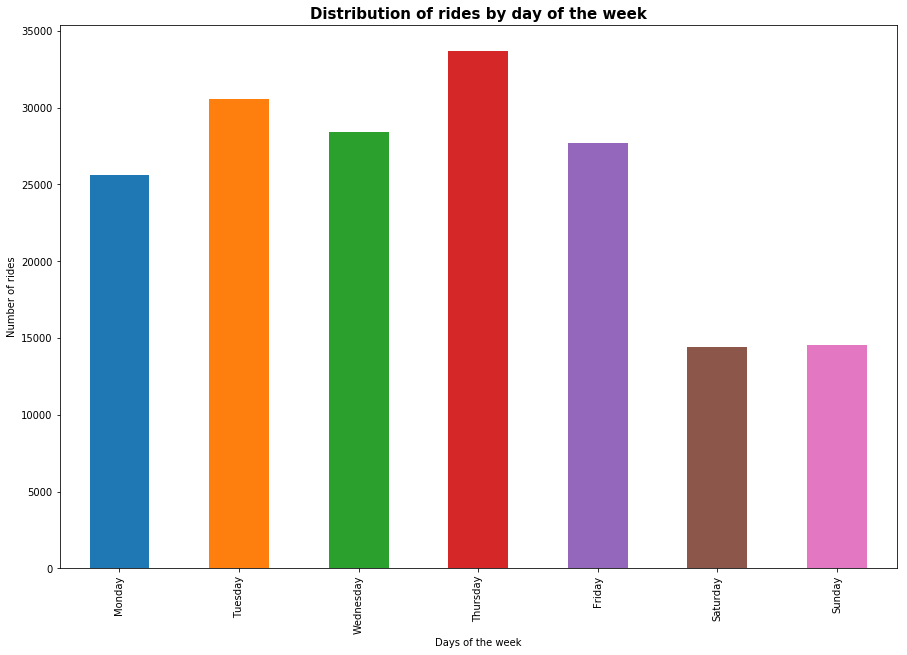

In [53]:
# Distribution of days


days_count = bike_df['day'].value_counts()
days_count.index = pd.CategoricalIndex(days_count.index, categories= ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"])
days_count.sort_index(level=0, inplace=True)
days_count.plot.bar(figsize = (15,10))
plt.xlabel('Days of the week')
plt.ylabel('Number of rides')
plt.title('Distribution of rides by day of the week', weight='bold', fontsize=15);

Most rides are taken on Weekdays, with a peak in number of rides on Thursday

In [54]:
hour_count = bike_df['hour'].value_counts().reset_index().rename(columns = {"index":"start_hour","hour":"count"}).sort_values('start_hour').set_index('start_hour')
hour_count

,count
start_hour,
0,893
1,525
2,355
3,164
4,227
5,866
6,3293
7,10231
8,20227


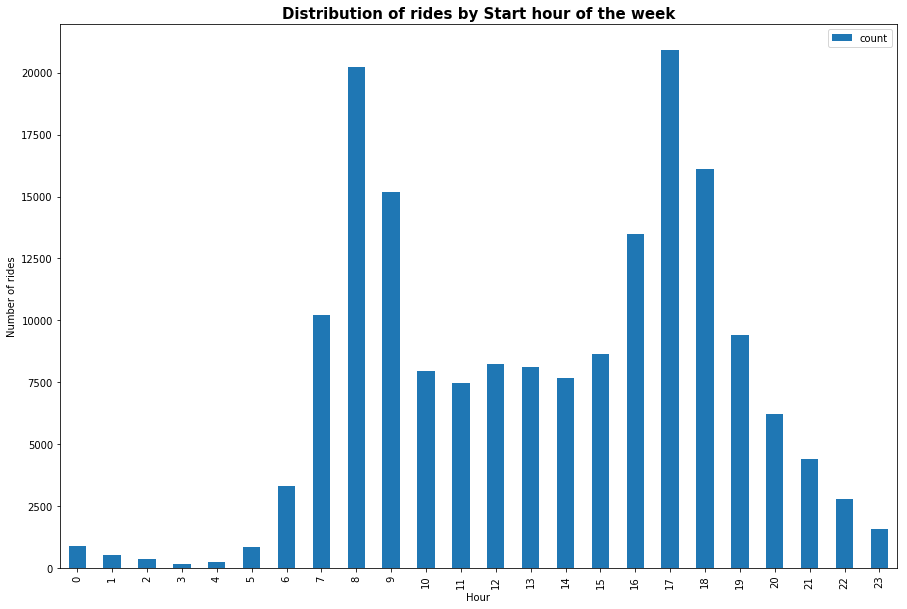

In [55]:
# Distribution of hours

hour_count.plot.bar(figsize = (15,10))
plt.xlabel('Hour')
plt.ylabel('Number of rides')
plt.title('Distribution of rides by Start hour of the week', weight='bold', fontsize=15);

It was observed that the peak period during the day is between 7:00 to 9: 00 am, then 16:00 to 18:00(4 to 6pm) in the evening

In [56]:
bike_df['user_type'].value_counts()

Subscriber    158386
Customer       16565
Name: user_type, dtype: int64

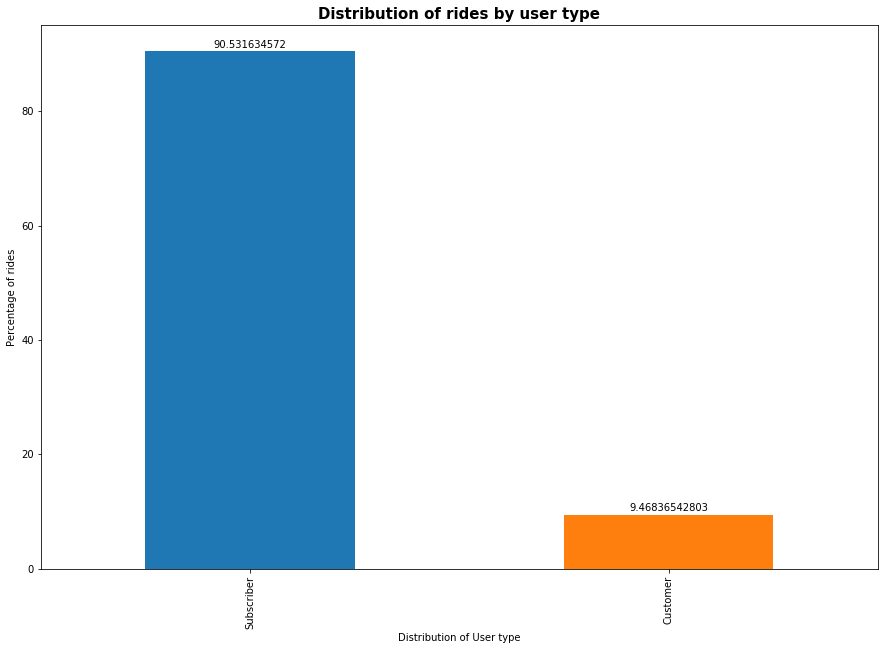

In [57]:
# user type distribution
user_count = bike_df['user_type'].value_counts()/len(bike_df['user_type']) * 100
user_count.plot.bar(figsize = (15,10))
plt.xlabel('Distribution of User type')
plt.ylabel('Percentage of rides')
plt.title('Distribution of rides by user type', weight='bold', fontsize=15)
# Logic to print value on each bar
for i in range (user_count.shape[0]):
    count = user_count[i]

    # Refer here for details of the text() - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html
    plt.text(i, count+2, count, ha = 'center', va='top')

90.5% of users are subscribers while only 9.5 are customers

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The plot of Duration(min) showed that most rides are between three to twelve minutes and that Duration(min) is Right Skewed, pointing to a user preference for shorter trips. The dependent variable Distance(km) looks roughly bimodal, with one peak between 0.8 and 1 km, and a second peak a little below 1.5 km. Futher evidence of users taking mainly short trips, visualization of the age and gender variables , showed that majority of users are Male and between ages 18 and 50, it was also discovered that there was considerable drop in number of rides on weekends.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Features with incorrect datatypes were identified and converted to enable analysis, a row with birth year of 1878 was also dropped as it was an outlier , The Duration varible was converted to minutes for easier interpretation and further features were engineered like duration_min column with ride duration in minutes, previous_bike_usage column that gives the previous usage count of a particular bike at the start of the ride, I also created year, month, day, hour from start_time to enable date analysis and a Member Age column.

## Bivariate Exploration <a name='Bivariate_Exploration' />

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [58]:
numeric_vars = ['duration_min', 'distance_km', 'member_age', 'previous_bike_rides']
categoric_vars = ['bike_share_for_all_trip', 'member_gender', 'day']

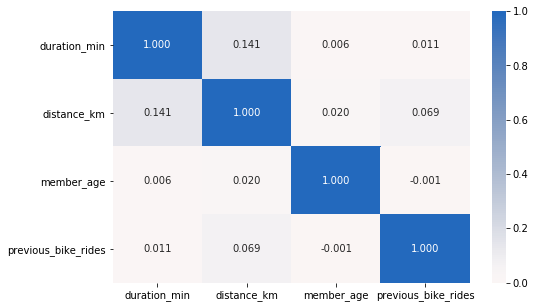

In [59]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(bike_df[numeric_vars].corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0)
plt.show()

The numeric variables have weak correlation at best with ride duration having the 'highest' coefficient followed by previous_bike_rides

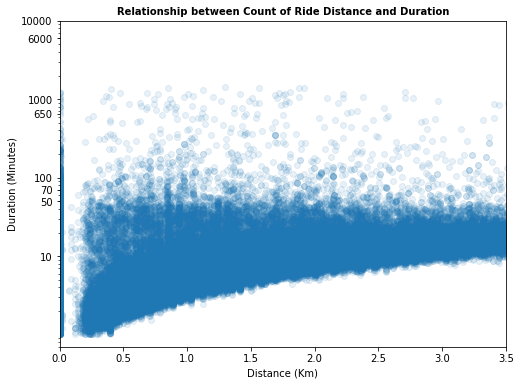

In [60]:
# scatter plot of duration vs. distance, with log transform on duration axis

plt.figure(figsize = [8, 6])
plt.scatter(data = bike_df, x = 'distance_km', y = 'duration_min', alpha = 1/10)
plt.xlim([0, 3.5])
plt.xlabel('Distance (Km)')
plt.yscale('log')
plt.yticks([10,50,70,100,650,1000,6000,10000], [10,50,70,100,650,1000,6000,10000])
plt.ylabel('Duration (Minutes)')
plt.title('Relationship between Count of Ride Distance and Duration', weight='bold', fontsize=10)
plt.show()

After performing a log tranform on Duration (min), The scatterplot shows that there is a positive correlation
between Ride Duration and Ride Distance 

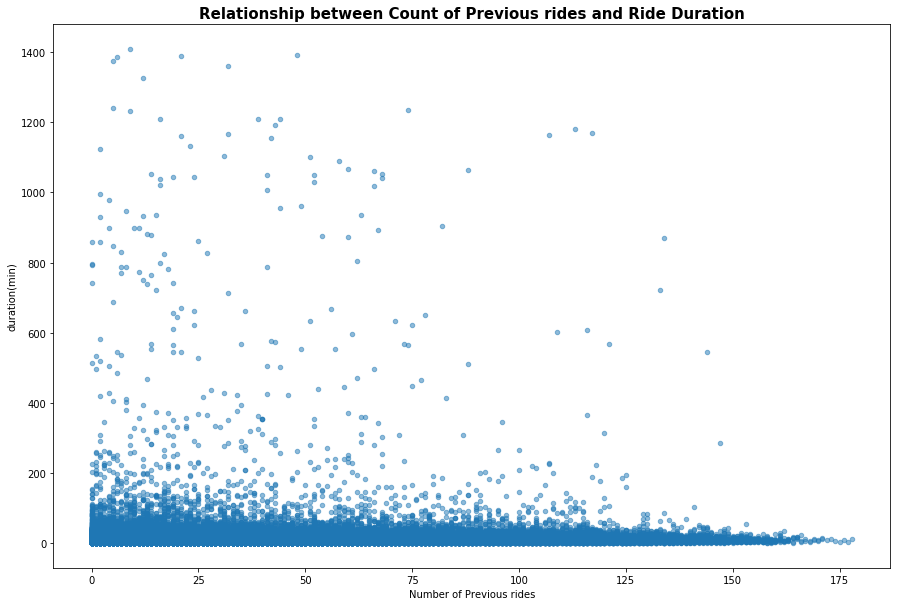

In [61]:
# Relationship between Previous rides and Ride Duration
x = bike_df.plot(kind = 'scatter', x = 'previous_bike_rides', y = 'duration_min', figsize = (15,10), alpha = 0.5)
x.grid(False)
plt.xlabel('Number of Previous rides')
plt.ylabel('duration(min)')
plt.title('Relationship between Count of Previous rides and Ride Duration', weight='bold', fontsize=15);

I can't infer much from this visual , I will proceed to look at the relationship between previous rides and ride duration, but this time, I will take the Maximum previous rides taken by a individual bike and its average duration.

In [62]:
# Relationship between Max previous rides and Average bike Duration
bike_duration = bike_df.groupby('bike_id')['duration_min'].mean().reset_index()
bike_info = bike_rides.merge(bike_duration, left_on = 'bike_id', right_on = 'bike_id', how = 'inner').rename(columns={"previous_bike_rides": "max_previous_rides","duration_min":"bike_avg_duration_min"})
bike_info.head()

,bike_id,max_previous_rides,bike_avg_duration_min
0,4902,134,18.407654
1,5905,52,31.293082
2,6638,116,18.524929
3,4898,77,10.844872
4,5200,83,17.245040


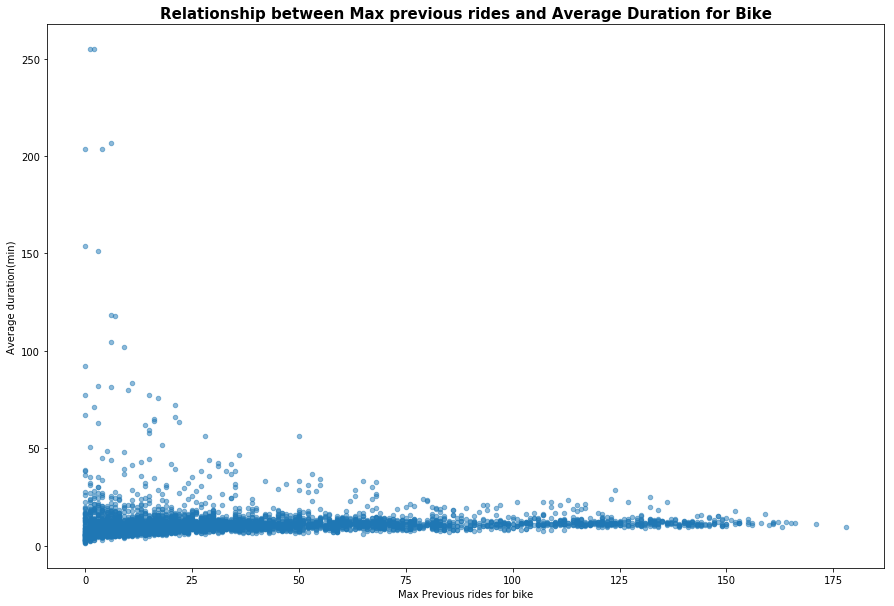

In [63]:
# Relationship between Max previous rides and Average Duration

x = bike_info.plot(kind = 'scatter', x = 'max_previous_rides', y = 'bike_avg_duration_min', figsize = (15,10), alpha = 0.5)
x.grid(False)
plt.xlabel('Max Previous rides for bike')
plt.ylabel('Average duration(min)')
plt.title('Relationship between Max previous rides and Average Duration for Bike', weight='bold', fontsize=15);

It was observed that bikes with less that 25 previous rides were able to accomplish ride duration of above 50 minutes, this could point to a maintainance issue on bikes as they get older.

In [64]:
# Relationship between Max previous rides and Average bike Duration
bike_distance = bike_df.groupby('bike_id')['distance_km'].mean().reset_index()
bike_trips = bike_rides.merge(bike_distance, left_on = 'bike_id', right_on = 'bike_id', how = 'inner').rename(columns={"previous_bike_rides": "max_previous_rides","distance_km":"bike_avg_distance_km"})
bike_trips.head()

,bike_id,max_previous_rides,bike_avg_distance_km
0,4902,134,1.707422
1,5905,52,1.918544
2,6638,116,1.891578
3,4898,77,1.890166
4,5200,83,1.726807


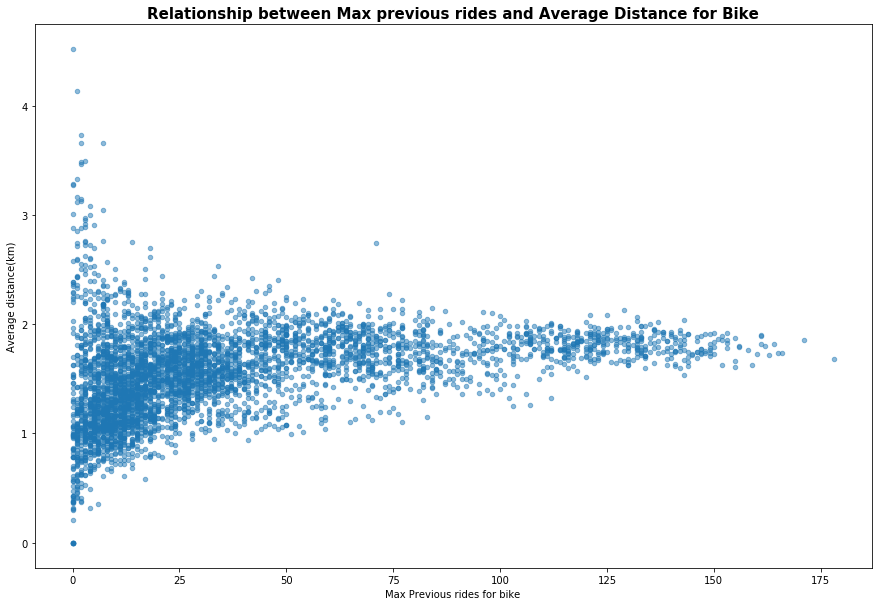

In [65]:
# Relationship between Max previous rides and Average Distance

x = bike_trips.plot(kind = 'scatter', x = 'max_previous_rides', y = 'bike_avg_distance_km', figsize = (15,10), alpha = 0.5)
x.grid(False)
plt.xlabel('Max Previous rides for bike')
plt.ylabel('Average distance(km)')
plt.title('Relationship between Max previous rides and Average Distance for Bike', weight='bold', fontsize=15);

The Average distance seems to increase as the number of max previous rides increases, pointing to a positive relationship between the two variables, however there seems to be a ceiling at about 2km, with mostly bikes with less than ten rides surpassing 3km.

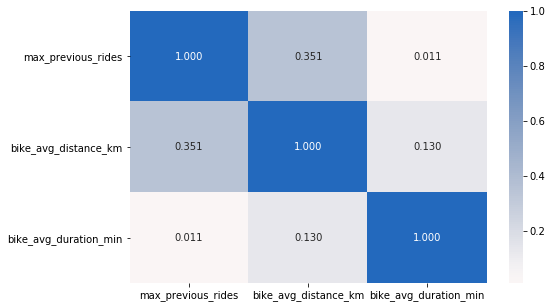

In [66]:
# filter numeric features for correlation plot
num_features = ['max_previous_rides','bike_avg_distance_km','bike_avg_duration_min']
bike_comb = bike_trips.merge(bike_duration, left_on = 'bike_id', right_on = 'bike_id', how = 'inner').rename(columns={"duration_min":"bike_avg_duration_min"})
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(bike_comb[num_features].corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0)
plt.show()

As earlier inferred there is a correlation albeit a weak one between bike_avg_distance and Max previous rides

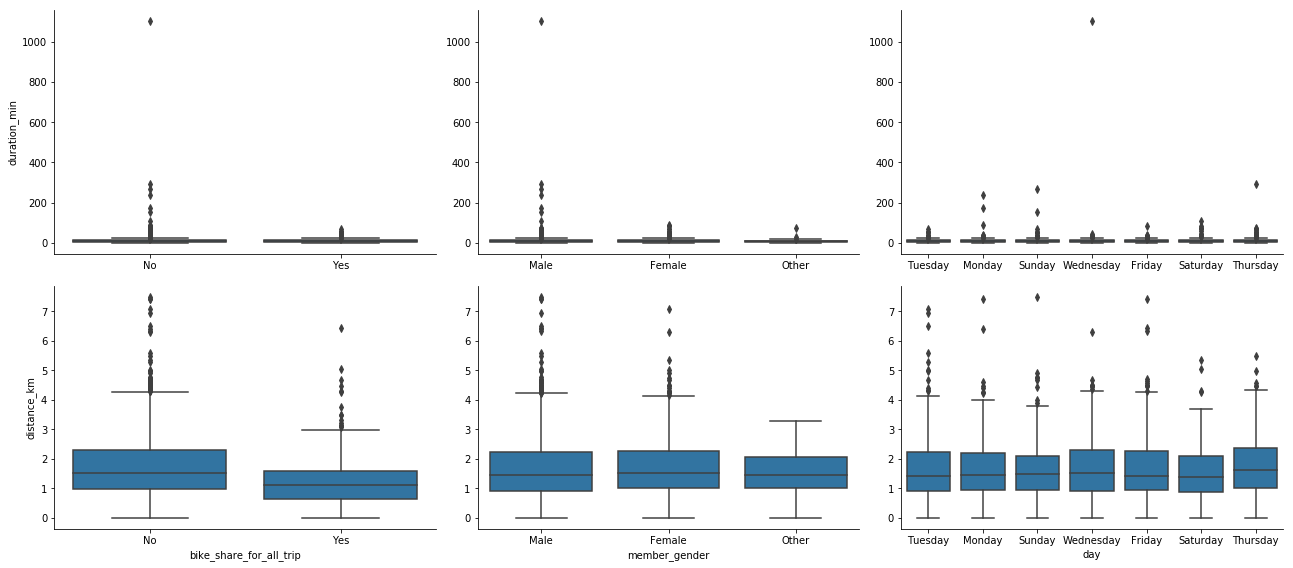

In [67]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.


bike_df_samp = bike_df.sample(n=2000, replace = False)

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = bike_df_samp, y_vars = ['duration_min', 'distance_km'], x_vars = categoric_vars,
                size = 4, aspect = 1.5)
g.map(boxgrid)
plt.show();

Interestingly there isn't much variation when it comes to ride distance/ duration and the categorical variables(Weekdays, Gender), However we see higher spread for ride duration on Fridays and higher spread for distance on Mondays, this may need to be investigated further.

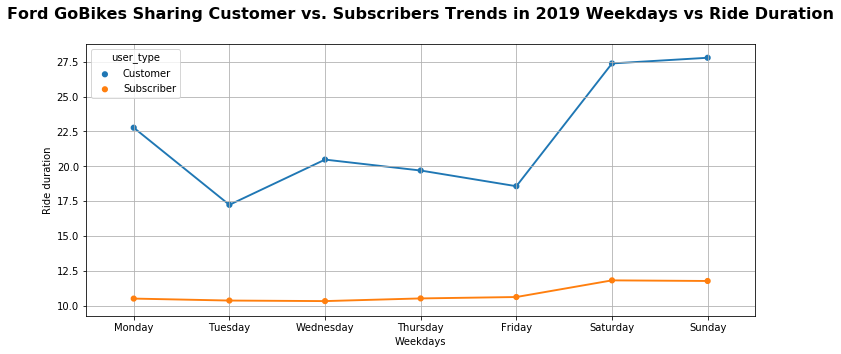

In [68]:
plt.figure(figsize=(12, 5))

df_cleaned_user_week = bike_df.groupby(['day', 'user_type'])['duration_min'].mean().reset_index()
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ax = sb.pointplot(data=df_cleaned_user_week, x='day', y='duration_min', hue = 'user_type', scale=.7,order = weekday);


plt.title('Ford GoBikes Sharing Customer vs. Subscribers Trends in 2019 Weekdays vs Ride Duration', y=1.07, fontsize=16, fontweight='bold')
plt.xlabel('Weekdays')
plt.ylabel('Ride duration');
plt.grid()
plt.show()

Ride duration for both Member groups( Customer & Subscriber ) peaks during weekends, probably because members aren't in a rush to get to their destination, unlike normal working days.

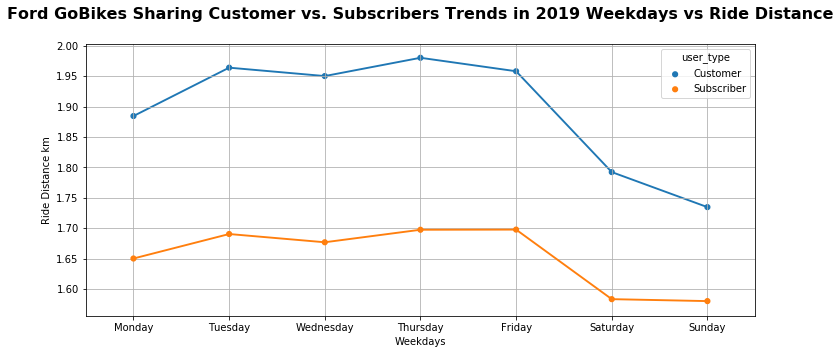

In [69]:
plt.figure(figsize=(12, 5))

df_cleaned_user_week = bike_df.groupby(['day', 'user_type'])['distance_km'].mean().reset_index()
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ax = sb.pointplot(data=df_cleaned_user_week, x='day', y='distance_km', hue = 'user_type', scale=.7,order = weekday);


plt.title('Ford GoBikes Sharing Customer vs. Subscribers Trends in 2019 Weekdays vs Ride Distance', y=1.07, fontsize=16, fontweight='bold')
plt.xlabel('Weekdays')
plt.ylabel('Ride Distance km');
plt.grid()
plt.show()

Interestingly there is a drop in ride Distance on weekends for both groups, pointing to shorter trips by members

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> As Expected the feature with the 'highest' correlation with Ride Duration was Ride distance, also bikes with previous rides less than fifty had higher average duration than others, pointing to a possible drop in performance by bikes after a threshold of trips.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Interestingly Ride distance for both member groups saw a sharp decline on Weekends
>
>It was also observed that the Average distance is positively correlated with Maximum previous rides, however there seems to be a ceiling at about 2km, with mostly bikes with less than ten rides surpassing 3km.

## Multivariate Exploration <a name='Multivariate_Exploration' />

> The main thing I want to explore in this part of the analysis is how the categorical variable days and user type play into the relationship between ride duration and distance.

In [70]:
def plot_heat_map(df,group,variable,color="YlGnBu",precision = 2):
    '''df - dataframe
       group - user_type(Customer, Subscriber)
       variable - Feature of interest(duration_min, distance_km)
       color - The mapping from data values to color space
       
       returns - heat map plot segmented by group, of days and hours by variable
    '''
    # Set plot dimensions
    plt.figure(figsize = [18,8])
    # Select group
    bike_df = df.query('user_type == @group')
    # filter for columns of interest 
    var_filter = bike_df.filter(items=['hour', 'day', variable])
    # Get average distance for day and hour
    var_filter = var_filter.groupby(['day','hour'])[variable].mean().reset_index()
    # Create pivot table
    var_trend = var_filter.pivot("day","hour",variable)
    # Sort index
    var_trend.index = pd.CategoricalIndex(var_trend.index, categories= ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"])
    var_trend.sort_index(level=0, inplace=True)
    # Plot heat_map
    ax = sb.heatmap(var_trend,cmap = color, annot = True, fmt = f".{precision}f",cbar_kws={'label': variable})
    return ax
    

**Distance trends**

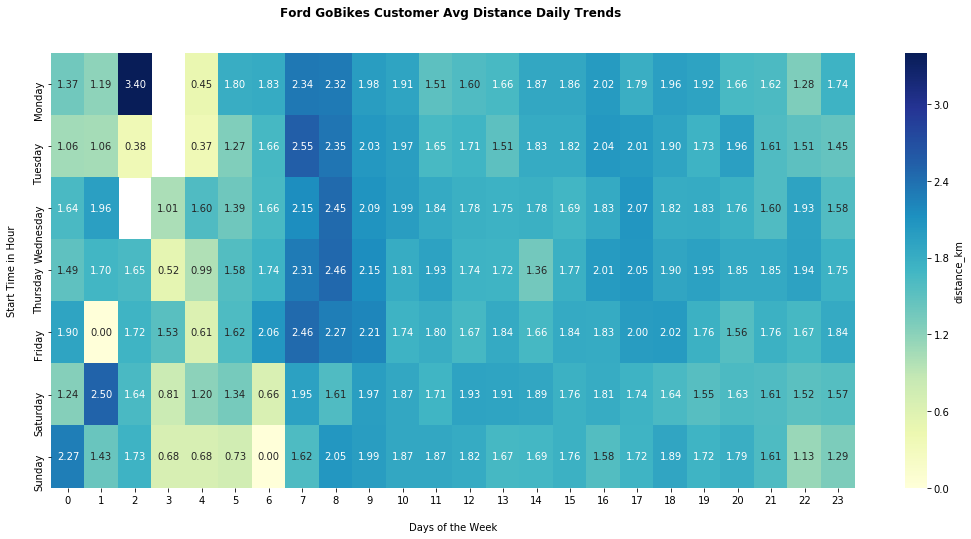

In [71]:
# Customer Avg Distance Daily Trends
plot_heat_map(bike_df,'Customer','distance_km')

plt.title('Ford GoBikes Customer Avg Distance Daily Trends ', y=1.07, fontweight='bold')
plt.xlabel('Days of the Week', labelpad = 17)
plt.ylabel('Start Time in Hour',  labelpad = 17)
plt.show()

In the heatmap, it is observered that on weekdays 7 to 9 am has the highest distance covered by the customer group 

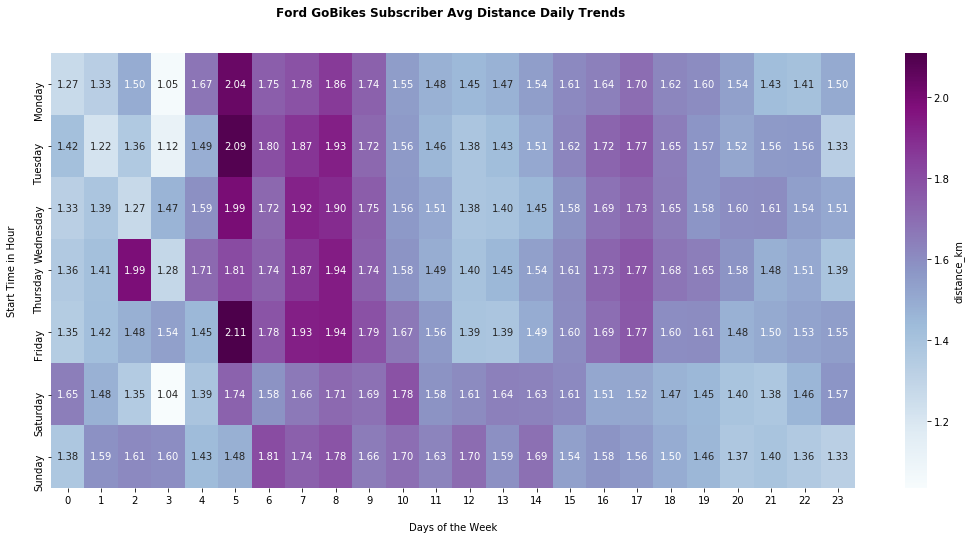

In [72]:
# Customer Avg Distance Daily Trends

plot_heat_map(bike_df,'Subscriber','distance_km','BuPu')

plt.title('Ford GoBikes Subscriber Avg Distance Daily Trends ', y=1.07, fontweight='bold')
plt.xlabel('Days of the Week', labelpad = 17)
plt.ylabel('Start Time in Hour',  labelpad = 17)
plt.show()

I observed similar trend in the subscriber group, with members covering higher distance mostly between 5 to 8 am on weekdays

**Duration Trends**

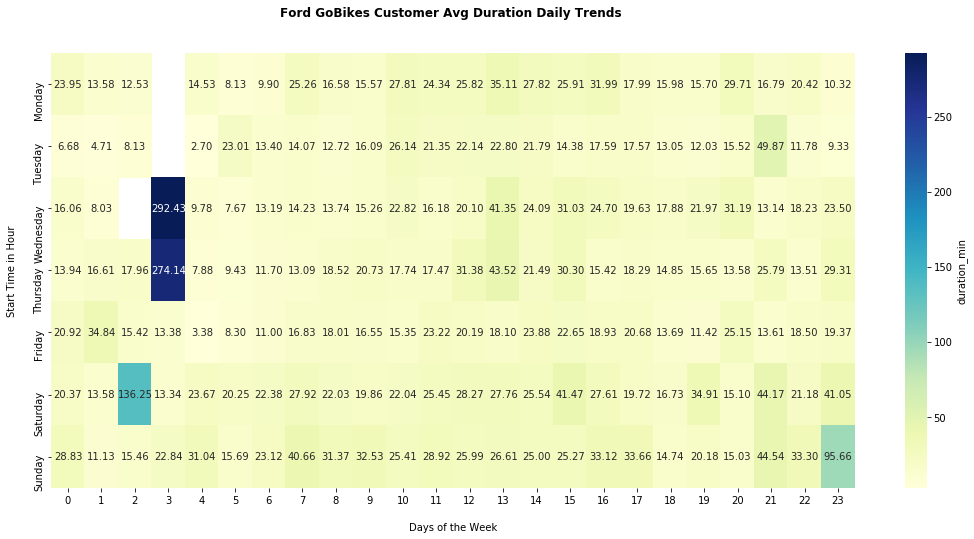

In [73]:
# Customer Avg Duration Daily Trends
plot_heat_map(bike_df,'Customer','duration_min')

plt.title('Ford GoBikes Customer Avg Duration Daily Trends ', y=1.07, fontweight='bold')
plt.xlabel('Days of the Week', labelpad = 17)
plt.ylabel('Start Time in Hour',  labelpad = 17)
plt.show()

For the customer group, peak ride duration was observed on Wednesday and Thursday between 3 to 4 am.

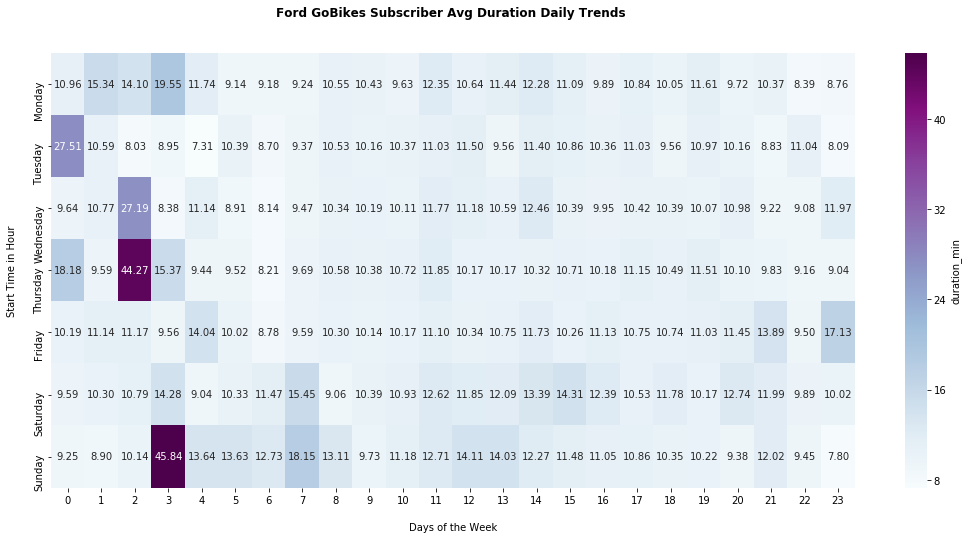

In [74]:
# Subscriber Avg Duration Daily Trends

plot_heat_map(bike_df,'Subscriber','duration_min','BuPu')

plt.title('Ford GoBikes Subscriber Avg Duration Daily Trends ', y=1.07, fontweight='bold')
plt.xlabel('Days of the Week', labelpad = 17)
plt.ylabel('Start Time in Hour',  labelpad = 17)
plt.show()

The same trend carried into the subscriber group with peak duration seen between 2-3 am on Wednesday and Thursday.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> After further investigation of the Customer and Subscriber groups, It was observered that peak distance was covered by the customer group on weekdays between 7 to 9 am, while subcribers had a similar trend between 5 to 8 am, in regards to the ride duration both groups saw a peak on Wednesday and Thursday for between 3 to 4 am for Customers and 2 to 3 am for Subscriber 



### Were there any interesting or surprising interactions between features?

> Through observation of the heatmap, Customers and Subscribers had similar habits as relates to Ride duration and distance, Interestingly both user groups saw peak ride duration for trips that started in the early hours(2 to 4 am) of Wednesday and Thursday

## Conclusions <a name='Conclusions' />

At the end of this interesting data analysis. I discovered some unexpected facts about the Ford GoBike Service, here are some of the key insights I ganered:

1. As envisaged Ride Duration is related to Ride distance, but another features which determines the duration of a trip is the previous usage of the bike, It was observed that bikes with less that 25 previous rides were able to accomplish ride duration of above 50 minutes, as a result were the only category of bikes to cover above 3km distance for trips

2. Both member groups see peak ride duration on Wednesday and Thursday for trips that started between 2 to 4 am.

3. FordGo members take more trips on weekdays which peak on thursdays and falls on weekends, in addition they cover a higher distances on weekdays for trips that started between 5 to 9 am.

4. FordGo members are mostly male aged between 18 and 50 years of which 90.5% of users are subscribers while only 9.5 are customers

5. Most bikes on the service have taken between zero to sixty previous rides.
